<a href="https://colab.research.google.com/github/Asif-PA/NetflixMovies-TVShowsClustering/blob/main/Asif_NetflixMovies%26TVShowsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [31]:
# Import Libraries
!pip install mapclassify
!pip install geopandas
# Import Libraries
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import math
from scipy.stats import *

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/netflix capstone/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive/


### Dataset First View

In [4]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'The number of rows in the dataset is: {df.shape[0]}')
print(f'The number of columns in the dataset is: {df.shape[1]}')

The number of rows in the dataset is: 7787
The number of columns in the dataset is: 12


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

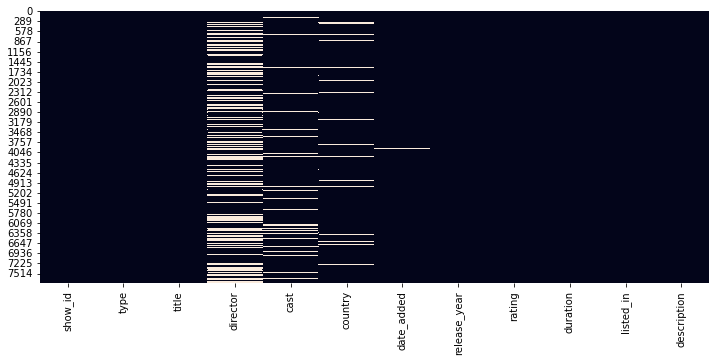

In [10]:
# Visualizing the missing values
#plotting missing values in heatmap
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)


In [11]:
from pandas.core import missing
# calulating perscentage of null values in the columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data
     

,Total,Percent
director,2389,0.306793
cast,718,0.092205
country,507,0.065109
date_added,10,0.001284
rating,7,0.000899
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


### What did you know about your dataset?

*   **Our dataset contain 7787 rows and 12 columns.**
*   **Datatype of all variables is object except release_year which is int64.**


*   **There is no duplicates in dataset**
*   **Maximum number of null values present in director column followed by cast.**



## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description 

*   show_id:Unique ID for every Movie / Tv Show

*   type : Identifier - A Movie or TV Show

*   title : Title of the Movie / Tv Show

*   director : Director of the Movie

*   cast : Actors involved in the movie / show
*   country : Country where the movie / show was produced


*   date_added : Date it was added on Netflix


*   release_year : Actual Releaseyear of the movie / show


*   rating : TV Rating of the movie / show


*   duration : Total Duration - in minutes or number of seasons


*   listed_in : Genere
*   description: The Summary description

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.apply(lambda x: x.nunique())


show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#Changing date_added to date time format
df["date_added"] = pd.to_datetime(df['date_added'])
#Extracting Year
df['year_added'] = df['date_added'].dt.year
#Extracting Month
df['month_added'] = df['date_added'].dt.month
#Extracting Day
df['day_added'] = df['date_added'].dt.day


In [17]:
#Seperating TV Show And Movie
netflix_tvshows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

In [18]:
print(f'shape of netflix_tvshows: {netflix_tvshows.shape}')
print(f'shape of netflix_movies: {netflix_movies.shape}')

shape of netflix_tvshows: (2410, 15)
shape of netflix_movies: (5377, 15)


In [24]:
netflix_tvshows['duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2410, dtype: object

In [25]:
#Changing the duration format for movies
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

In [26]:
netflix_tvshows['duration']

0       4 Seasons
5        1 Season
11       1 Season
12       1 Season
16       1 Season
          ...    
7767     1 Season
7775     1 Season
7777    2 Seasons
7779     1 Season
7785     1 Season
Name: duration, Length: 2410, dtype: object

In [27]:
#Changing duration of tvshows to interger
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Season','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Seasons','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace('s','')
netflix_tvshows['duration']=netflix_tvshows['duration'].astype(str).astype(int)
netflix_tvshows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

### What all manipulations have you done and insights you found?

*   **I have changed the date_added column dtype to datetime format and we have extracted year and month from that and made two seperate columns.**
*   **Made two seperate dataframe for movies and tvshows.**

*   **Changed the duration of movies and tvshows dataframe into string.**


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [35]:
#made a custom function for the countplot as it helps the reusability of the code.This fuction accepts 6 positional arguments and 1 optional argument
def create_countplot(data, x, title, xlabel, ylabel,figsize,hue=None,order=None):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=x,hue=hue,order=order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
    plt.tight_layout()  
    plt.show()

#### Chart - 1 **Visualisaztion of most watch type**

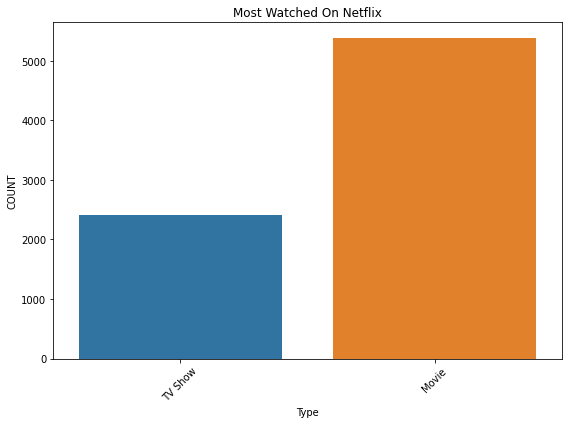

In [29]:
#using countplot function for the visualization
create_countplot(data=df,x='type',title='Most Watched On Netflix',xlabel='Type',ylabel='COUNT',figsize=(8, 6))

In [32]:
# Create a piechart
#Ploting Donut chart for better visualisation
# Create data for the chart
labels = df.type.value_counts().sort_index().index
values = df.type.value_counts().sort_index().values
# Create the donut chart
fig = px.pie(values=values, names=labels,height=500, width=600, hole=.5,title='Mostly watched on Netflix')
fig.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
# Display the chart
fig.show()


##### 1. Why did you pick the specific chart?

**I have used two plot:**

**1)Countplot- Show the counts of observations in each categorical bin using bars.**

**2)Donut Chart-A donut chart is almost identical to a pie chart, but the center is cut out (hence the name ‘donut’). Donut charts are also used to show proportions of categories that make up the whole, but the center can also be used to display data.**

##### 2. What is/are the insight(s) found from the chart?

**Movies are getting watched mostly than TV shows.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can see that TV shows are less than movies so Netflix should release more contents of tv shows also to retain its viewer.**

#### Chart - 2 **Visualisation of Top 10 Directors**

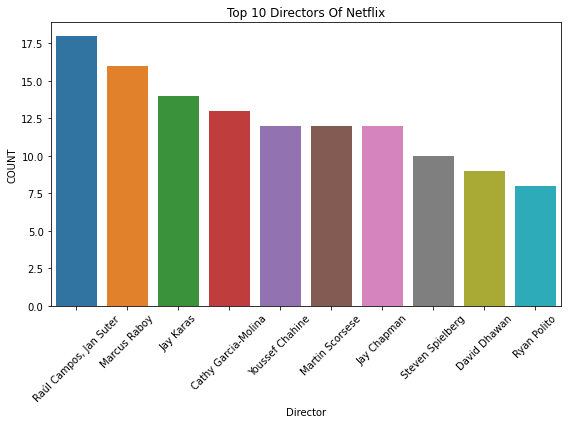

In [38]:
# Chart - 2 visualization code
#using countplot function for the visualization
create_countplot(data=df,x='director',title='Top 10 Directors Of Netflix',xlabel='Director',ylabel='COUNT',figsize=(8, 6),order=df.director.value_counts().head(10).index)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

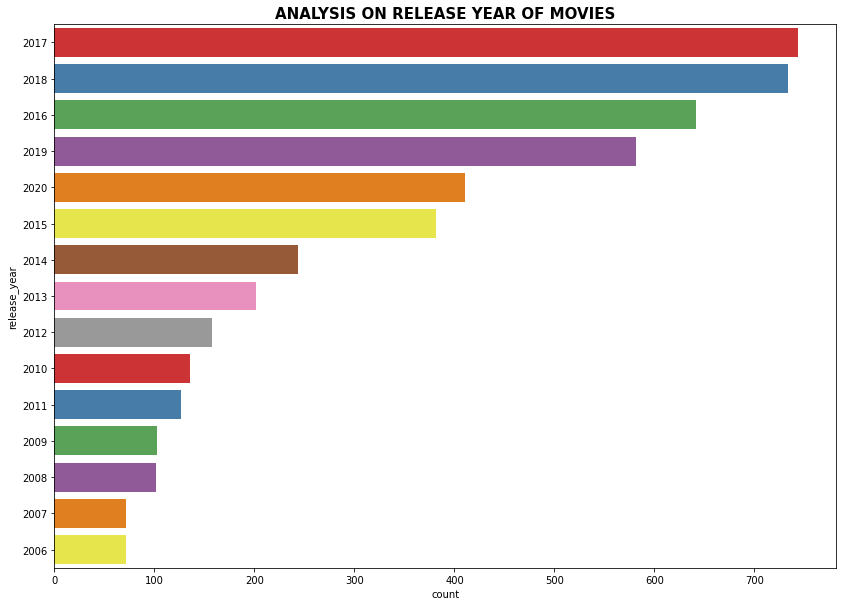

In [23]:
# Chart - 3 visualization code
#Year wise analysis
plt.figure(figsize=(14,10))
ax = sns.countplot(y="release_year", data=df_movies, palette="Set1", order=df_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()
     



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

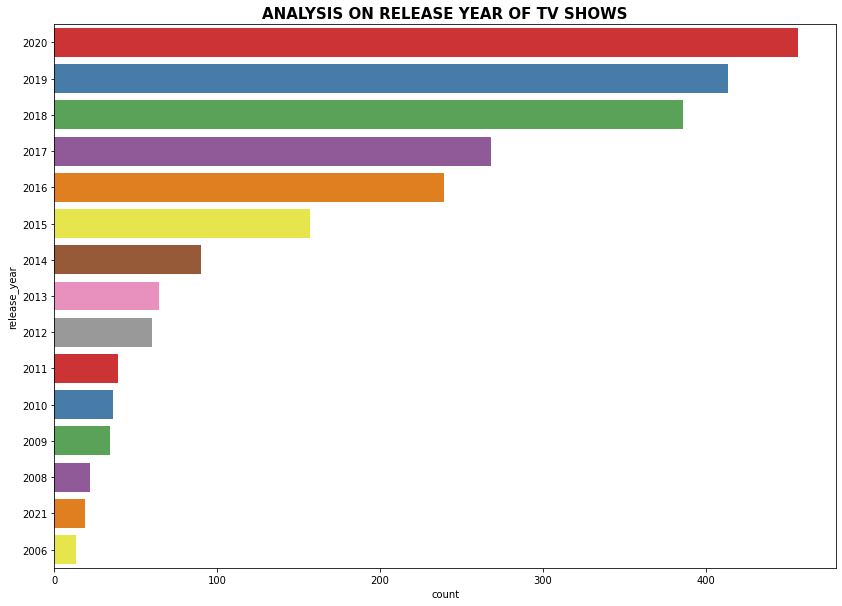

In [24]:
# Chart - 4 visualization code
#Year wise analysis
plt.figure(figsize=(14,10))
ax = sns.countplot(y="release_year", data=df_shows, palette="Set1", order=df_shows['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS', fontsize=15, fontweight='bold')
plt.show()
     



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

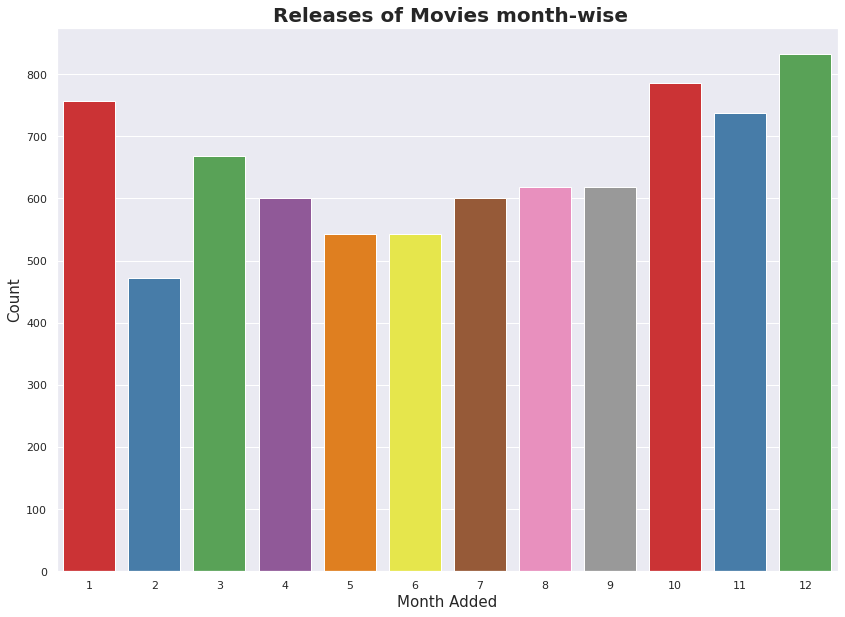

In [25]:
# Chart - 5 visualization code
# Release of movies month-wise
sns.color_palette("cubehelix", as_cmap=True)
sns.set(rc={'figure.figsize':(14,10)})
sns.countplot(x='month_added',data=netflix_dataset,palette="Set1")


plt.title(' Releases of Movies month-wise',fontsize = 20,fontweight="bold")  
plt.xlabel('Month Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

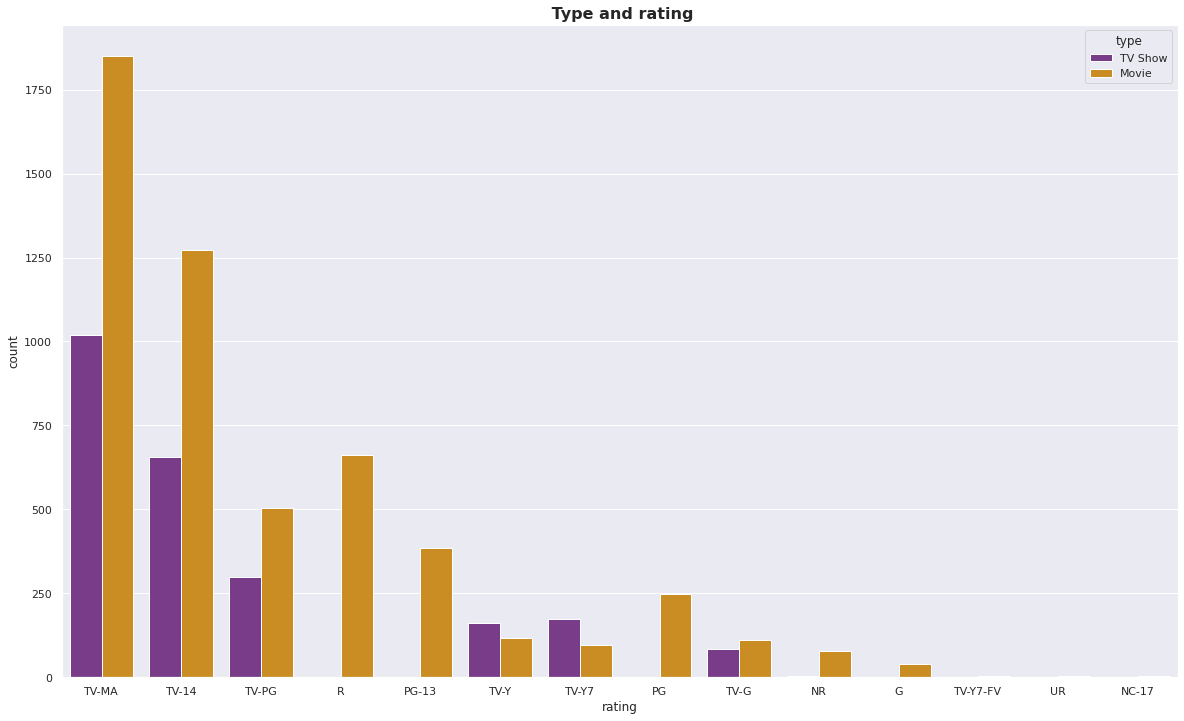

In [26]:
# Chart - 6 visualization code
#Rating
plt.figure(figsize=(20,12))
sns.countplot(x='rating',hue='type',data=netflix_dataset,palette="CMRmap", order=netflix_dataset['rating'].value_counts().index[0:15])
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()
     


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

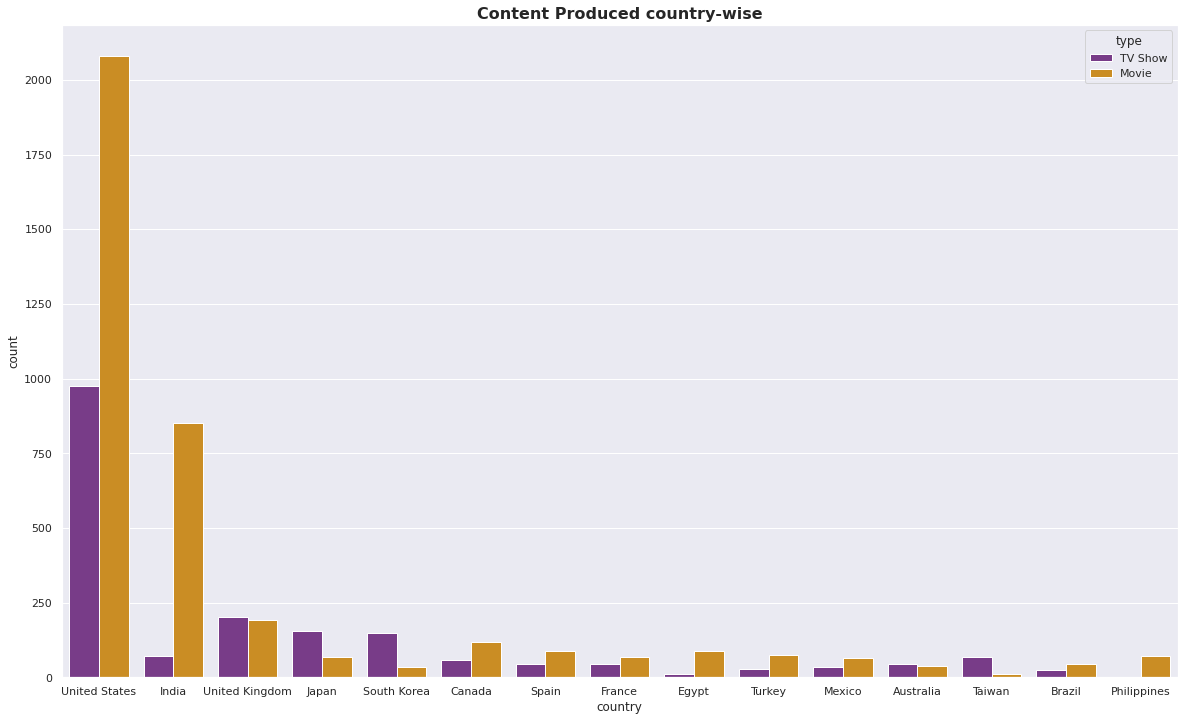

In [27]:
# Chart - 7 visualization code
plt.figure(figsize=(20,12))
sns.countplot(x='country',hue='type',data=netflix_dataset,palette="CMRmap", order=netflix_dataset['country'].value_counts().index[0:15])
plt.title('Content Produced country-wise',size='16',fontweight="bold")
plt.show()
     


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [28]:
# Chart - 8 visualization co
netflix_dataset['cast']=netflix_dataset['cast'].apply(lambda x: x.strip(','))
netflix_dataset['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              unknown
Name: cast, Length: 7777, dtype: object

##### 1. Why did you pick the specific chart?

Answer Here.

In [29]:
netflix_cast=[]
for i in netflix_dataset['cast']:
  netflix_cast.append(i)

netflix_cast


['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
 'Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane',
 'Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin',
 'Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan, Saygın Soysal, Berkan Şal, Metin Belgin, Ayça Eren, Selin Uludoğan, Özay Fecht, Suna Yıldızoğlu',
 'Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad',
 'Samuel L. Jackson, John Heard, Kelly Row

In [30]:

netflix_cast_dict={}
for actor in netflix_cast:                                                   
  if actor in netflix_cast_dict:
    netflix_cast_dict[actor] +=1
  else:
    netflix_cast_dict[actor] = 1

netflix_cast_dict = dict(sorted(netflix_cast_dict.items(), key=lambda item: item[1],reverse=True))          
     

In [31]:
netflix_cast_dict

{'unknown': 718,
 'David Attenborough': 18,
 'Samuel West': 10,
 'Jeff Dunham': 7,
 'Kevin Hart': 6,
 'Craig Sechler': 6,
 'Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath': 6,
 'Bill Burr': 5,
 'Iliza Shlesinger': 5,
 'Jim Gaffigan': 5,
 'Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sabina Malik, Jigna Bharadhwaj, Rajesh Kawa': 4,
 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep': 4,
 'Bill Hicks': 4,
 'Jerry Seinfeld': 4,
 'Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson': 4,
 'Jim Jefferies': 4,
 'Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal': 4,
 'Mike Birbiglia': 4,
 'Jay O. Sanders': 4,
 'Sam Kinison': 4,
 'Tom Segura': 4,
 'Vir Das': 4,
 'Rachael Stirling': 3,
 'Aziz Ansari': 3,
 'Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Ramya Krishnan, Nassar, Subbaraju': 3,
 'Bert Kreischer': 3,
 'Chelsea Handl

In [32]:
#top 10 actors on netflix
netflix_cast_count = pd.DataFrame(netflix_cast_dict.values(),netflix_cast_dict.keys()).reset_index().rename(columns={'index':'actors', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='Actors',y='count',data=netflix_cast_count,palette="Blues")
plt.title("Top 10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

ValueError: ignored

<Figure size 1080x360 with 0 Axes>

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***